# U.S. Medical Insurance Costs

## Introduction

## Data Preparation

In [8]:
# All of our import statements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Read our insurance data into a data frame
insurance_df = pd.read_csv('insurance.csv')

print(insurance_df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


## Feature Analysis

### Age

#### Age Distribution Across Regions in Our Data

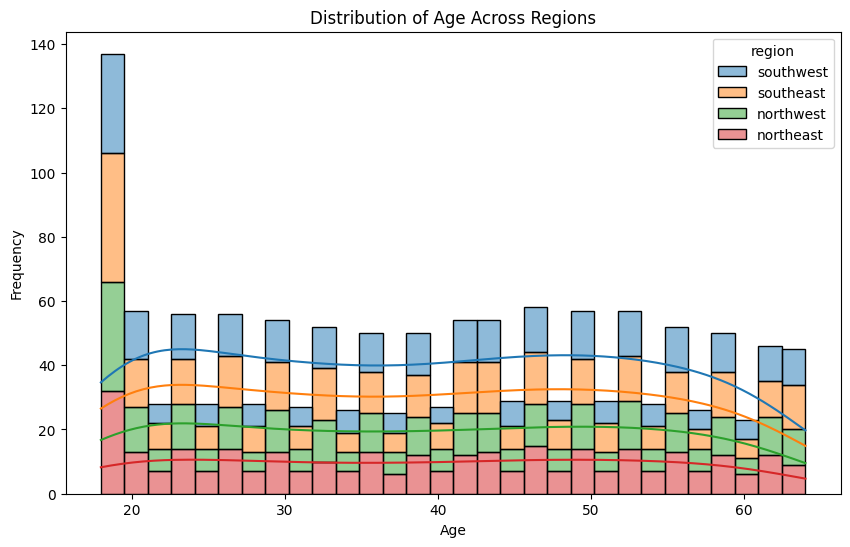

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(insurance_df, x='age', bins=30, kde=True, hue='region', multiple='stack')
plt.title('Distribution of Age Across Regions')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Average and Median Age in Our Data

In [21]:
# Calculates and returns the average age as a float value from the provided dataframe
def find_average_age(data):
    return data['age'].mean()

def find_median_age(data):
    return data['age'].median()

In [22]:
average_age = find_average_age(insurance_df)
median_age = find_median_age(insurance_df)
print(f"In our dataset, the average age is {average_age} while the median age is {median_age}")

In our dataset, the average age is 39.20702541106129 while the median age is 39.0


#### Relationship between Age and Smoking Behavior

In [42]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, float('inf')]
labels = ['<20', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90+']
insurance_df['age_group'] = pd.cut(insurance_df['age'], bins=bins, labels=labels, right=False)

# Calculate the percentage of smokers and non-smokers for each age group
age_group_smoking_percentage = insurance_df.groupby(['age_group', 'smoker']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)

# Print the resulting dataframe
print(age_group_smoking_percentage)

smoker           no       yes
age_group                    
<20        0.781022  0.218978
20s        0.800000  0.200000
30s        0.774319  0.225681
40s        0.777778  0.222222
50s        0.848708  0.151292
60s        0.763158  0.236842
70s             NaN       NaN
80s             NaN       NaN
90+             NaN       NaN


/tmp/ipykernel_13467/3444279331.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_smoking_percentage = insurance_df.groupby(['age_group', 'smoker']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)


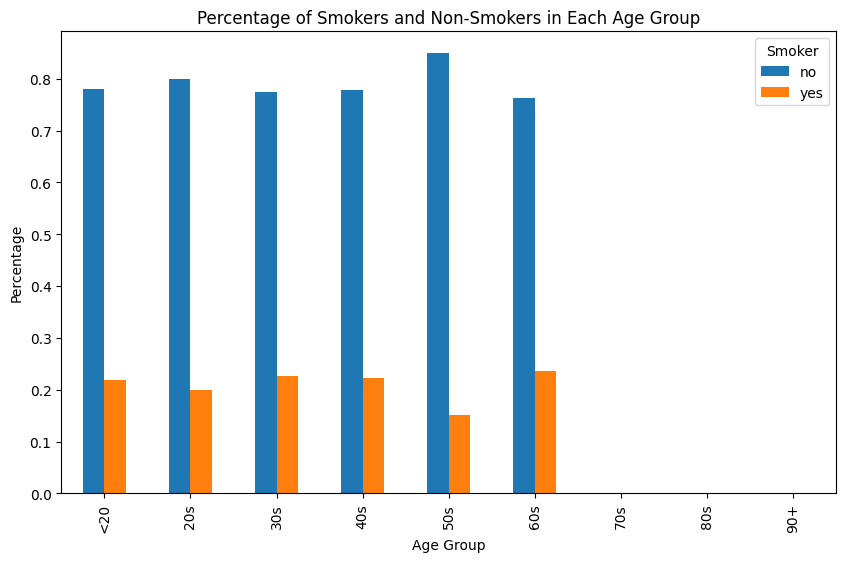

In [46]:
age_group_smoking_percentage.plot(kind='bar', figsize=(10, 6))
plt.title('Percentage of Smokers and Non-Smokers in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Smoker')
plt.show()

#### Impact of Age on BMI
<p><b>Note:</b> BMI is not necessarily an accurate predictor of health due to it reducing complex phenomena to a single number. Insurance companies use this BMI in their calculations, hence why we will use it in parts of our analysis, but would like to be clear of the skepticism around its relevance to our data and findings</p>

##### Distribution of BMI Age Groups

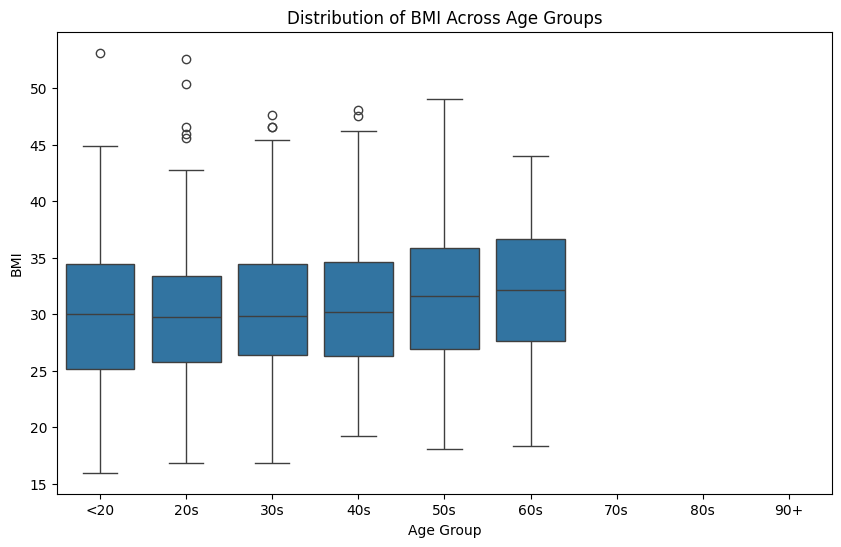

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='bmi', data=insurance_df)
plt.title('Distribution of BMI Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('BMI')
plt.show()

##### BMI Average Across Age Groups

In [52]:
# Calculate the average BMI for each age group
average_bmi_by_age_group = insurance_df.groupby('age_group')['bmi'].mean().reset_index()

# Print the resulting DataFrame
print(average_bmi_by_age_group)

  age_group        bmi
0       <20  29.971496
1       20s  29.786964
2       30s  30.443833
3       40s  30.709642
4       50s  31.510203
5       60s  32.016316
6       70s        NaN
7       80s        NaN
8       90+        NaN


/tmp/ipykernel_13467/4177249569.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_bmi_by_age_group = insurance_df.groupby('age_group')['bmi'].mean().reset_index()


## Insurance Cost Analysis